# VC - Entrega Práctica 3
---
 - Luis Martín Pérez
- Andrea Santana López

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv

### TAREA 1 - Detector de dinero en monedas

Text(0.5, 1.0, 'Amount of money is: 0 €')

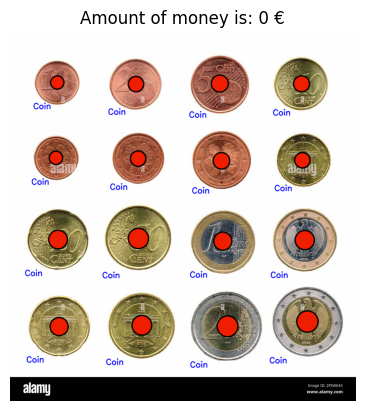

In [9]:
umbral = 200
img = cv2.cvtColor(cv2.imread('CoinsImages/monedas_2.jpg'), cv2.COLOR_BGR2RGB)
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th,img_th = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)


gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza imagen (elimina altas frecuencias)
pimg = cv2.medianBlur(gris, 7)

circ = cv2.HoughCircles(
        pimg,  # imagen
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # valor del gradiente
        param2=50, # umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
thickness = 2

money_amount = 0
for circle_x, circle_y, circle_radius in circ[0]:
    cv2.circle(img, (int(circle_x), int(circle_y)), int(circle_radius*0.3), (240, 30, 0), -1)
    cv2.circle(img, (int(circle_x), int(circle_y)), int(circle_radius*0.3 + 1), (0, 0, 0), 3)
    img = cv2.putText(img, 'Coin', (int(circle_x - circle_radius*1.1) , int(circle_y + circle_radius*1.2)), font,
                   fontScale, (0, 0, 255), thickness, cv2.LINE_AA)


plt.axis("off")
plt.imshow(img)
plt.title(f'Amount of money is: {money_amount} €')

# Detector Microplasticos

In [10]:
#Cargan directamente a grises
imgorig = cv2.imread('./MicroplasticImages/MPs_test.jpg')
#Muestra la imagen en grises
cv2.imshow('En escala de grises',imgorig)
cv2.waitKey(0)
cv2.destroyAllWindows()